# OK Cupid profiles EDA

OK Cupid is a dating app where you can meet your new love - Who knows, the love of your life 😏 
In this exercise, we will go through the customer profiles dataset provided from OK Cupid app and do do exploratory data analysis.

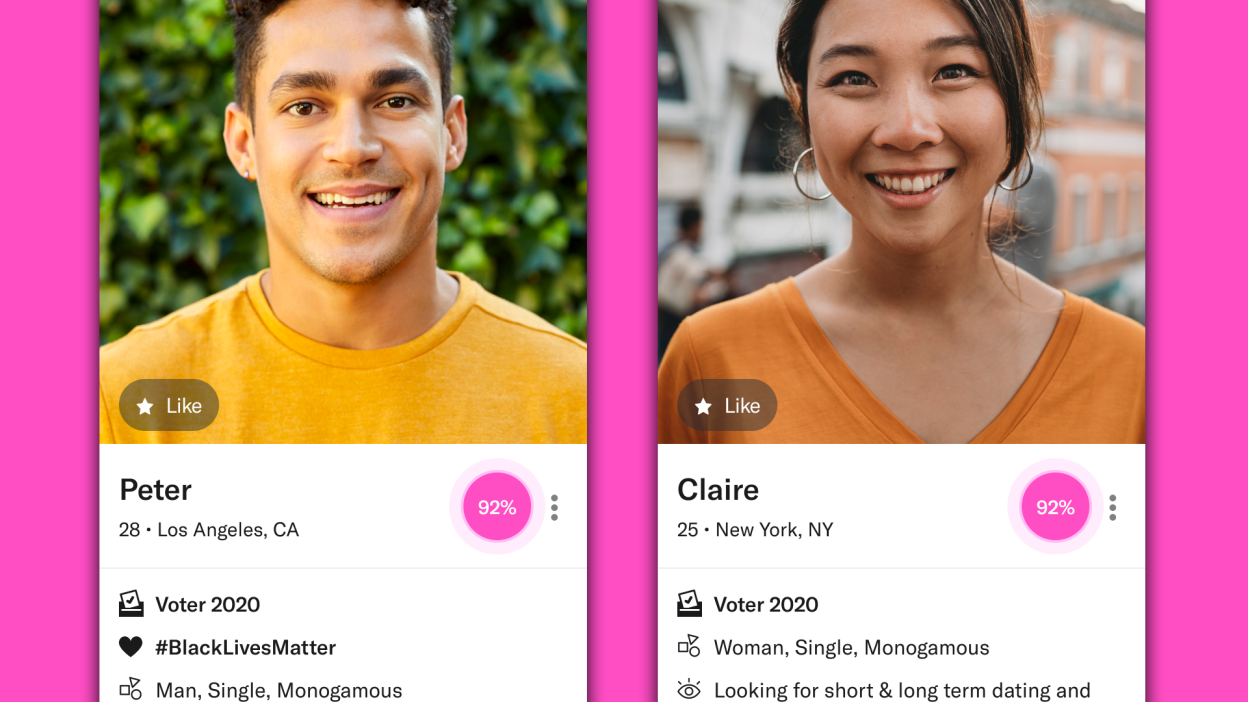

In [24]:
%cd /content/drive/MyDrive/딥러닝기초

/content/drive/MyDrive/딥러닝기초


## Upload dataset

In [25]:
import pandas as pd


df = pd.read_csv('./okcupid_profiles.csv')
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

## Essay column 

Looking at some sample values in the 'essay' features (essay0 to essay9), it seems like they all deal with user descriptions. 

It is not clear, why user descriptions have to be separated in multiple columns. It will be easier to do data analysis when we convert them into a one single column. We will create a new column - essay .

In [30]:
df['essay'] = df.iloc[:, 21:].astype(str).agg(' '.join, axis=1) # join all string columns 
df.drop(columns=df.columns[21:-1], inplace=True) # delete the essay columns except the new one 
df.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...


## Top Nouns 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

adj_list = list()

for i in range(1,6):

  for j in range(2):
    count_words = dict()
    for review in df[(df['Rating']==i)&(df['Recommended IND']==j)]['Review Text']:
      review = nltk.word_tokenize(str(review))
      pos_tagged = nltk.pos_tag(review)
      words = filter(lambda x:x[1] in ('JJ','JJR','JJS') ,pos_tagged)
      for word in words:
        word = word[0]
        if word in count_words:
          count_words[word]+=1
        else:
          count_words[word] = 1

    ratings_adj.append(count_words)
     

In [74]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

count_nouns = dict()

for essay in df[(df['sex']=='m')]['essay']:
  tokens = nltk.word_tokenize(str(essay))
  pos_tagged = nltk.pos_tag(tokens)
  nouns = filter(lambda x:x[1] in ('NN','NNS') ,pos_tagged)
  for noun in nouns:
    noun = noun[0]
    if noun in count_nouns:
      count_nouns[noun]+=1
    else:
      count_nouns[noun]=1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
sorted(count_nouns.items(), key=lambda x: x[1], reverse=True)

[('i', 281132),
 ('music', 44989),
 ('people', 43551),
 ('time', 38533),
 ('friends', 38102),
 ('life', 37755),
 ('things', 36047),
 ('food', 33084),
 ('movies', 26228),
 ('anything', 21016),
 ('work', 18855),
 ('lot', 18625),
 ('family', 16518),
 ('something', 16385),
 ('someone', 15716),
 ('world', 15498),
 ('books', 15179),
 ('fun', 14266),
 ('years', 13347),
 ('way', 13278),
 ('day', 12785),
 ('person', 11937),
 ('guy', 11515),
 ('city', 10610),
 ('movie', 10437),
 ('home', 10423),
 ('school', 10385),
 ('love', 9797),
 ('everything', 9744),
 ('thing', 9673),
 ('tv', 9592),
 ('stuff', 9449),
 ('rock', 9213),
 ('kind', 8312),
 ('night', 8271),
 ('man', 8098),
 ('shows', 8052),
 ('job', 7955),
 ('book', 7773),
 ('sense', 7698),
 ('games', 7564),
 ('art', 7456),
 ('area', 7366),
 ('year', 7280),
 ('humor', 7015),
 ('bit', 6918),
 ('others', 6688),
 ('game', 6635),
 ('francisco', 6465),
 ('show', 6122),
 ('house', 5985),
 ('times', 5834),
 ('friend', 5750),
 ('place', 5719),
 ('mind', 5

## Numeric features

The dataset contains many string columns except the three, which are - age, height, income. We will first look at these three features. There are 3 missing values in column, height. 

In [51]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [35]:
list(df.select_dtypes(['int64','float64']).columns)

Index(['age', 'height', 'income'], dtype='object')

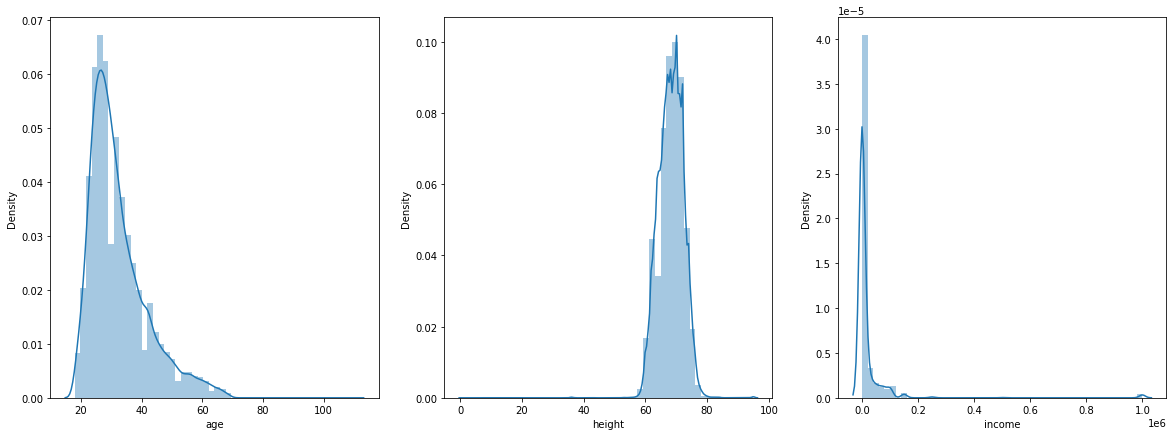

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20,7)


num_features = list(df.select_dtypes(['int64','float64']).columns)

fig, axes = plt.subplots(1, 3)

for i, col in enumerate(num_features):
  sns.distplot(df[col], ax=axes[i])

- Age distribution : Distributed widely between 20 and 40. Most of the users are in their 20s (closer look in the next plot), so we can call them as the target age group of OK Cupid app. Compared to them it is much less but still there are some users above 40s. It seems there is no age restriction for using the app but it tends to be a dating app for young adults.

- Height distribution : Users are mostly 160-180cm tall. 

- Income distribution : Except very few users who earn extraordinarilly, which we can regard them as outliers. The income distribution is right skwed. 

Let's count users by their age and sex.

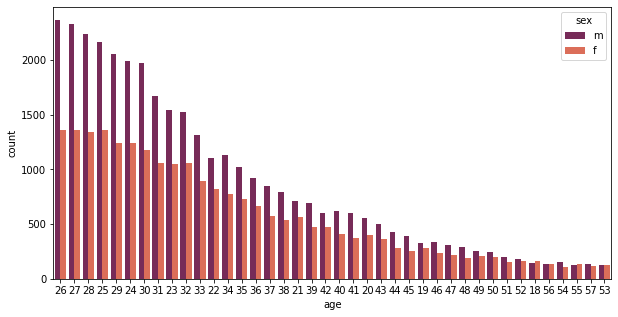

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df,
hue='sex',palette="rocket",
order=df['age'].value_counts().iloc[:40].index);

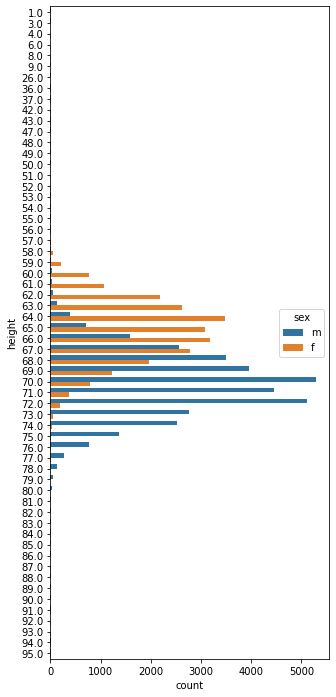

In [58]:
plt.rcParams["figure.figsize"] = (5,12)

sns.countplot(y='height', hue='sex', data=df)

Now let's look closer at height and sex features. It seems height distribution for each gender is normally distributed respectively. Female users are mostly around 164-166cm tall, while male users are mostly 170-172cm.